# Reducing Neutron Depth Profiling Data
A Jupyter notebook designed to work through NDP data using the
python package ndpReduce

Copy this notebook and the related "Schema.ipynb" into the lowest level 
directory that contains the ndp data you wish to process. 

This notebook relies on input from a schema.json file, created with
a separate notebook titled "Schema.ipynb". You should work through that
notebook before running this code.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from ndp import ndpData

#These are just print options I set so I can print data objects, do not affect calculations
np.set_printoptions(threshold=40)
np.set_printoptions(precision=10)
np.set_printoptions(suppress=True)

## Run NDPReduce
First, create the class and give it a name. We create a new object for each sample, so the name can be something representative of the sample (i.e. heat1 or heat2). If you plan to look at the data in another application, the name is aribtrary as it will die when you close this notebook. But remember, the cells below will need to be changed to reflect your choice of name of the data set. 

In [2]:
# Create instance for this sample
ndp = ndp.ndpData()

# Load instrument configuration
ndp.readconfig('c:/Users/rljones/Documents/GitHub/ndp/config/config.json')

# Run your schema
ndp.runschema('heat0x.json')

## Plot and Print Data

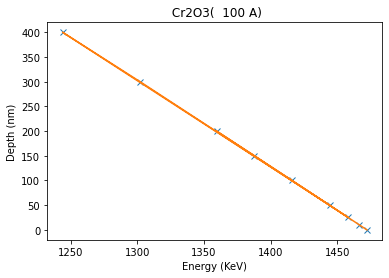

In [3]:
#Plot TRIM data and the polynomial fit of the data
yval = ndp.TRIM['Depth']
xval = ndp.TRIM['Energy']

a, b, c = ndp.TRIM['Coeffs']
yfit = a*xval*xval + b*xval + c

title = ndp.TRIM['Material'][0]

fig, ax = plt.subplots()

ax.set_title(title)

ax.set_xlabel('Energy (KeV)')
ax.set_ylabel('Depth (nm)')
ax.plot(xval, yval, marker = 'x', linestyle='None')
ax.plot(xval, yfit, marker = 'None', linestyle='-')

plt.show()

In [4]:
# Print the instrument configuration
pprint(ndp.instrument)

{'Beam Energy': 1472.35,
 'Calib Coeffs': [0.7144, -12.45],
 'Configuration': 'Default',
 'Mon Peak Channels': [1900, 2901],
 'Num Channels': 4096,
 'Zero Channel': 2077}


In [5]:
# Print the TRIM data
pprint(ndp.TRIM)

{'Coeffs': array([  -0.0001885984,   -1.2389363512, 2232.9359758187]),
 'Depth': array([  0.          ,  10.1070775849, 100.1149602066, 150.1151533625,
       200.1152888528,  25.1061837579, 300.1152689681, 400.115773818 ,
        50.1120760598]),
 'Energy': array([1472.35 , 1466.694, 1416.164, 1387.879, 1359.507, 1458.294,
       1302.011, 1243.826, 1444.274]),
 'Layers': [{'Files': ['10 nm Cr2O3 alpha.txt',
                       '100 nm Cr2O3 alpha.txt',
                       '150 nm Cr2O3 alpha.txt',
                       '200 nm Cr2O3 alpha.txt',
                       '25 nm Cr2O3 alpha.txt',
                       '300 nm Cr2O3 alpha.txt',
                       '400 nm Cr2O3 alpha.txt',
                       '50 nm Cr2O3 alpha.txt'],
             'Path': 'C:\\Users\\rljones\\Documents\\NDP Data\\Cr2O3 two '
                     'heats/TRIM/'}],
 'Material': [' Cr2O3(  100 A)',
              ' Cr2O3( 1000 A)',
              ' Cr2O3( 1500 A)',
              ' Cr2O3( 2000 A)',


In [6]:
# Print the Sample, Reference, and Background Data
pprint(ndp.data)

{'Bgd Dat': {'Counts': array([0., 0., 0., ..., 0., 0., 0.]),
             'Counts/Dt': array([0., 0., 0., ..., 0., 0., 0.]),
             'Counts/Dt Uncert': array([0., 0., 0., ..., 0., 0., 0.]),
             'Datetime': datetime.datetime(2010, 8, 1, 15, 46, 9),
             'Detector': ['Lynx-01-Master',
                          'Lynx-01-Master',
                          'Lynx-01-Master',
                          'Lynx-01-Master'],
             'Dt ratio': 0.9996392183225701,
             'Files': ['190810_Binek_Blnk_Cr2O3_3mm036.spe',
                       '190810_Binek_Blnk_Cr2O3_3mm036_001.spe',
                       '190810_Binek_Blnk_Cr2O3_3mm036_002.spe',
                       '190810_Binek_Blnk_Cr2O3_3mm036_003.spe'],
             'Labels': ['190810_Binek_Blnk_Cr2O3_3mm',
                        '190810_Binek_Blnk_Cr2O3_3mm',
                        '190810_Binek_Blnk_Cr2O3_3mm',
                        '190810_Binek_Blnk_Cr2O3_3mm'],
             'Live Time': 28788.19,
 

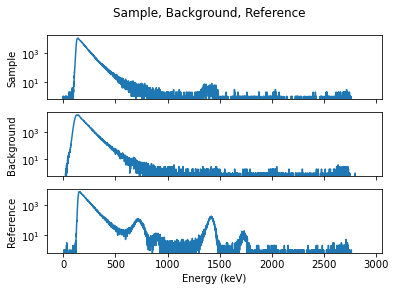

In [7]:
#Plot the three data original data sets (summed and deadtime corrected) 
fig, axs = plt.subplots(3, 1, sharex=True)

fig.suptitle('Sample, Background, Reference')

axs[0].set_ylabel('Sample')
axs[0].plot(ndp.detector["Energy"], ndp.data["Sam Dat"]["Counts"])
axs[0].set_yscale('log')

axs[1].set_ylabel('Background')
axs[1].plot(ndp.detector["Energy"], ndp.data["Bgd Dat"]["Counts"])
axs[1].set_yscale('log')

axs[2].set_ylabel('Reference')
axs[2].plot(ndp.detector["Energy"], ndp.data["Ref Dat"]["Counts"])
axs[2].set_yscale('log')
axs[2].set_xlabel('Energy (keV)')
plt.show()

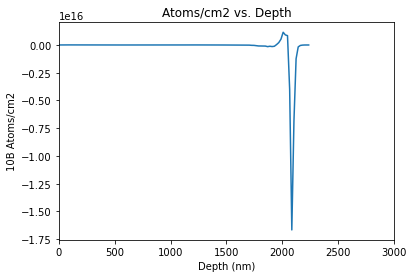

In [8]:
# Plot the main result of the measurement
fig, ax = plt.subplots()

ax.set_title('Atoms/cm2 vs. Depth')
ax.set_ylabel('10B Atoms/cm2')
ax.set_xlabel('Depth (nm)')
ax.plot(ndp.detector["Depth Binned"], ndp.data["Sam Dat"]["Atoms/cm2 Binned"])
ax.set_yscale('linear')
ax.set_xlim(0, 3000)
#ax.set_ylim(0, 1e16)
plt.show()